In [2]:
import numpy as np
import random as r
from matplotlib import pyplot as plt

In [4]:
class System_no_immunity:
    def __init__(self, n, infection_ratio):
        self.n = n
        self.infected = 0
        self.time_step = 0
        self.infection_ratio = infection_ratio
        self.infection_steps = []
        self.grid = []
        for i in range(n):
            rand_res = r.randint(1, 75)
            rec = 0
            self.grid.append(Node(rand_res, rec))

    
    def patient_zero(self):
        p0 = self.grid[r.randint(0,self.n-1)]
        p0.infect(100, self.time_step)
        self.infected = 1
        self.infection_steps.append(self.infected)
    
    def __str__(self):
        msg = ""
        for i in self.grid:
            msg += str(i.infection_status) + " "
        return msg
    
    def infection(self):
        while self.infected < self.n:
            for i in range(self.infected):
                for j in range(self.infection_ratio):
                    target = r.randint(0, self.n-1)
                    die = r.randint(1, 100)
                    succ_inf = self.grid[target].infect(die, self.time_step)
                    if succ_inf:
                        self.infected += 1
                    self.time_step += 1
            self.infection_steps.append(self.infected)

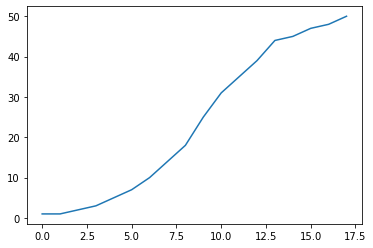

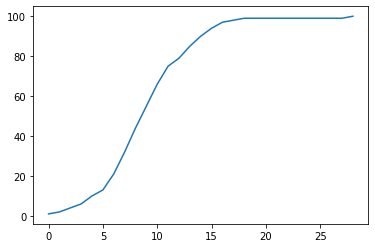

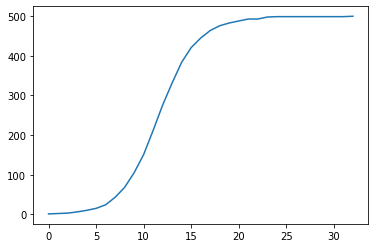

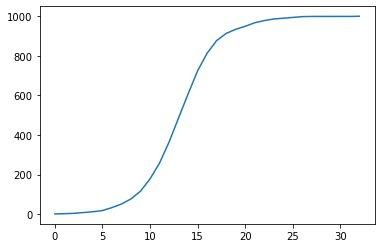

In [5]:
for n in [50, 100, 500, 1000]:
    system = System_no_immunity(n, infection_ratio = 1)
    system.patient_zero()
    system.infection()
    
    plt.plot(system.infection_steps)
    plt.show()

In [50]:
class Node:   
    def __init__(self, res, rec):
        self.infection_status = 0  # Healthy
        self.infection_time = -1  # No infection time
        self.immunity_status = 0  # Not immune
        self.resistance = res  # 0 - 100 where 100 is immune
        self.recovery_time = rec
    
    def infect(self, die, time_step):
        if die > self.resistance and self.infection_status == 0:
            self.infection_status = 1
            self.infection_time = time_step
            return True
        return False
            
    def attempt_recovery(self):
        self.recovery_time -= 1
        if self.recovery_time == 0:
            self.immune()
            return True
        return False
        
    def immune(self):
        self.infection_status = 0
#         self.immunity_status = 1
        self.resistance = 75

In [54]:
class System:
    def __init__(self, n, infection_ratio):
        self.n = n
        self.infected = 0
        self.immune = 0
        self.time_step = 0
        self.infection_ratio = infection_ratio
        self.infection_steps = []
        self.immunity_steps = []
        self.grid = []
        self.A = []
        for i in range(n):
            rand_res = r.randint(1, 75)
            rec = r.randint(15, 25)
            self.grid.append(Node(rand_res, rec))
    
    def patient_zero(self):
        p0 = self.grid[r.randint(0,self.n-1)]
        p0.infect(100, self.time_step)
        self.infected = 1
        self.infection_steps.append(self.infected)
    
    def __str__(self):
        msg = ""
        for i in self.grid:
            msg += str(i.infection_status) + " "
        return msg
    
    def get_infected(self):
        infected_nodes = []
        for i in self.grid:
            if i.infection_status == 1:
                infected_nodes.append(i)
        return infected_nodes
    
    def infection(self):
        while self.infected > 0:
            for node in self.get_infected():
                for j in range(self.infection_ratio):
                    target = self.grid[r.randint(0, self.n-1)]
#                     die = r.randint(1, 100)
                    die = 100
                    succ_inf = target.infect(die, self.time_step)
                    if succ_inf:
                        self.infected += 1
                    self.time_step += 1
                recover = node.attempt_recovery()
                if recover:
                    self.infected -= 1
                    self.immune += 1
            self.infection_steps.append(self.infected)
            self.immunity_steps.append(self.immune)
            self.A = self.infected/self.n
            print(self.immune)
            print(self.A)

In [55]:
for n in [50, 100, 500, 1000]:
    system = System(n, infection_ratio = 1)
    system.patient_zero()
    system.infection()
    
    plt.plot(system.infection_steps)
    plt.plot(system.immunity_steps)
    plt.title('A = '+str(max(system.A)))
    plt.show()
    
    d_inf = [system.infection_steps[i]-system.infection_steps[i-1] for i in range(1, len(system.infection_steps))]
    d_imm = [system.immunity_steps[i]-system.immunity_steps[i-1] for i in range(1, len(system.immunity_steps))]
    plt.plot(d_inf)
    plt.plot(d_imm)
    plt.show()

0
0.02
0
0.04
0
0.08
0
0.14
0
0.24
0
0.42
0
0.6
0
0.88
0
0.92
0
0.94
0
0.96
0
1.0
0
1.0
0
1.0
0
1.0
0
1.0
1
0.98
2
1.0
3
0.98
3
0.98
4
1.0
6
1.0
12
0.94
16
0.88
19
0.88
24
0.88
30
0.84
34
0.88
37
0.88
38
0.94
41
0.92
48
0.88
49
0.96
49
0.98
50
0.98
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50

50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0

1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50

50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0

50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0

50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0

50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0

50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0

50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0

50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0

50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0

1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50

50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0

50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0

50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0

1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50

50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0

50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0

50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0

50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0

1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50

50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0

50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0

50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0
50
1.0

KeyboardInterrupt: 